In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
raw = pd.read_excel('data-facial-wash.xlsx')
raw.head()

,Merk_Produk,Harga,Jenis_Kulit,Rating,Jumlah_Terjual
0,Cetaphil Gentle Skin Cleanser,23250,1,3.504,1334
1,MS Glow Facial Wash,26500,2,4.231,978
2,COSRX Low pH Good Morning Gel Cleanser,16999,3,4.883,1243
3,COSRX Salicylic Acid Daily Gentle Cleanser,32500,4,4.654,256
4,Scarlett Whitening Facial Wash,21300,5,4.764,660


In [3]:
data = raw.drop(['Merk_Produk'], axis=1)
data.head()

,Harga,Jenis_Kulit,Rating,Jumlah_Terjual
0,23250,1,3.504,1334
1,26500,2,4.231,978
2,16999,3,4.883,1243
3,32500,4,4.654,256
4,21300,5,4.764,660


In [4]:
# Define hyperparameters
n_clusters_range = range(2, 15)
n_clusters = 4
max_iter = 1000
m = 2
error = 0.005

In [5]:
# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data.to_numpy().T, n_clusters, m, error=error, maxiter=max_iter, init=None, seed=42
    )

# Predict cluster membership for each data2 point
cluster_membership = np.argmax(u, axis=0)

# Print the cluster centers
print('Cluster Centers:', cntr)
 
# Print the cluster membership for each data2 point
print('Cluster Membership:', cluster_membership)

Cluster Centers: [[3.26526050e+04 1.90701399e+00 4.38081268e+00 7.31381466e+02]
 [8.62499971e+04 3.21000894e+00 4.65333186e+00 8.73457433e+02]
 [3.19988116e+05 4.00001383e+00 3.99299877e+00 6.95999710e+02]
 [1.69066821e+04 2.81858231e+00 4.15709356e+00 8.09230921e+02]]
Cluster Membership: [3 0 3 0 3 3 0 3 3 3 0 0 3 3 3 3 0 0 2 3 0 0 3 0 0 1 0 3 0 1 0 1 0 0 3]


In [6]:
d

array([[9.42189639e+03, 6.15754570e+03, 1.56619636e+04, 4.99279762e+02,
        1.13528298e+04, 1.44526173e+04, 3.49535499e+02, 1.86126387e+04,
        1.86566065e+04, 1.93779980e+04, 6.77343145e+02, 9.52161543e+02,
        1.71540434e+04, 1.24539260e+04, 1.67863360e+04, 1.06526586e+04,
        1.93286957e+02, 2.31491448e+04, 2.87347397e+05, 2.32026624e+04,
        1.04653898e+03, 5.34742752e+03, 1.57608787e+04, 7.26015134e+02,
        3.03714337e+02, 6.73474126e+04, 6.56498591e+02, 1.44026562e+04,
        2.05494766e+02, 3.23497749e+04, 4.67201057e+03, 5.22640081e+04,
        8.22391031e+01, 8.92362438e+02, 1.67781776e+04],
       [6.30016805e+04, 5.97500886e+04, 6.92519831e+04, 5.37535436e+04,
        6.49503479e+04, 6.80501092e+04, 5.32500977e+04, 7.22102152e+04,
        7.22519298e+04, 7.29754800e+04, 5.42509615e+04, 5.45483509e+04,
        7.07509998e+04, 6.60507892e+04, 7.03829987e+04, 6.42500887e+04,
        5.37500023e+04, 3.04503308e+04, 2.33750070e+05, 7.68000505e+04,
       

In [7]:
initialized_u = u0.T
initialized_u

array([[0.16989996, 0.36670751, 0.35030788, 0.11308465],
       [0.50992314, 0.163382  , 0.10658273, 0.22011213],
       [0.46015959, 0.06140045, 0.00347142, 0.47496855],
       [0.25724951, 0.29402174, 0.35041189, 0.09831685],
       [0.1130563 , 0.31894914, 0.51221235, 0.0557822 ],
       [0.12029269, 0.09410784, 0.56216226, 0.22343721],
       [0.03909374, 0.33328366, 0.51911104, 0.10851156],
       [0.45485111, 0.01805829, 0.03888273, 0.48820787],
       [0.2245462 , 0.33967616, 0.13390469, 0.30187295],
       [0.41259956, 0.15079317, 0.06751783, 0.36908944],
       [0.00851418, 0.27403329, 0.35699791, 0.36045461],
       [0.35808648, 0.11508237, 0.23011894, 0.29671222],
       [0.44516155, 0.2781144 , 0.17695283, 0.09977122],
       [0.12380086, 0.31875051, 0.03705666, 0.52039197],
       [0.14940376, 0.15189306, 0.25553106, 0.44317212],
       [0.08024304, 0.42421214, 0.14227403, 0.35327078],
       [0.11247101, 0.28654789, 0.26971779, 0.33126332],
       [0.21685796, 0.38825217,

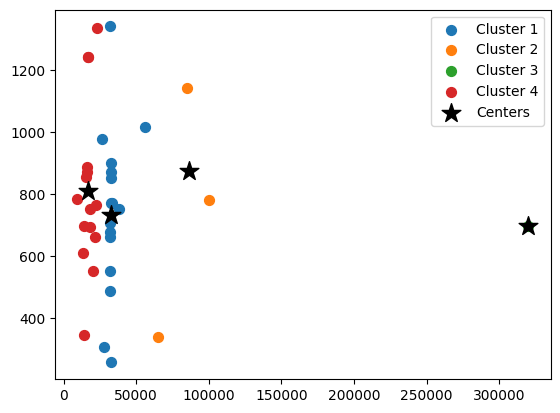

In [8]:
# Plot results (adjust if you have more than 2 features)
data_plot = data.to_numpy()
for j in range(n_clusters):
    plt.scatter(data_plot[:, 0][cluster_membership == j], 
                data_plot[:, 3][cluster_membership == j], 
                s=50, label=f'Cluster {j+1}')

plt.scatter(cntr[:, 0], cntr[:, 3], s=200, c='black', marker='*', label='Centers')
plt.legend()
plt.show()

In [9]:
# # Apply fuzzy c-means clustering
# fpcs = []
# for n_clusters in n_clusters_range:
#     cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, m, error=error, maxiter=max_iter, init=None, seed=42)
#     fpcs.append(fpc)

In [10]:
# # Line plot of FPC vs. number of clusters
# plt.plot(n_clusters_range, fpcs)
# plt.xlabel('Number of Clusters')
# plt.ylabel('FPC')
# plt.title('FPC Variation')
# plt.show()